In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'

path_data = path
path_res = path

fgro = 'start_mb.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_20micros_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

path_data = path
path_res = path

fgro = 'start_mb.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_20micros_mb_fixed_t1.xtc'

In [2]:
# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 10% GM1

name = '_DPPC_DIPC_chol_352_10GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_10/'

path_data = path
path_res = path

fgro = 'start_mb.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_20micros_mb_fixed_t1.xtc'

In [3]:
u = mda.Universe( path_data+fgro, path_data+fxtc)

In [4]:
sel_all = u.select_atoms("all")

for ts in u.trajectory:
    PO4 = u.select_atoms("name PO4 and resname DPPC") # and resname D*PC pour avoir juste les rouges

In [5]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [6]:
# Attention apparemment il y a un lipide qui dépasse dans la simus 3:5:2!
# contient 20000 frames

In [7]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM5)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM5')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 5272
number of lipids in the upper leaflet: 2676 + number of lipids in the lower leaflet:2596 
= 5272


In [8]:
# TAKE THE LAST FRAME

u.trajectory[19999]

< Timestep 19999 with unit cell dimensions [428.47583 428.47583 209.67029  90.       90.       90.     ] >

Text(0.5,1,'Répartition des espèces')

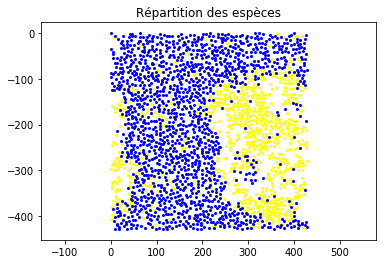

In [9]:
xmin=0
ymin=0

Lo = leaflet0.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DPPC").positions
Ld = leaflet0.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DIPC").positions
plt.scatter(Lo[:,1], -Lo[:,0], marker='o', c='yellow', s=4)
plt.scatter(Ld[:,1], -Ld[:,0], marker='o', c='b', s=4)

plt.axis('equal')
plt.title('Répartition des espèces',fontsize=12)

In [10]:
print(np.shape(Lo))
print(np.shape(Ld))

(810, 3)
(1566, 3)


In [11]:
# create a matrix for each phase with a 4th column that returns 1 if the phase is Lo and 0 if it's Ld

Lo2 = np.zeros((len(Lo),4))
Lo2[:,0] = Lo[:,0]
Lo2[:,1] = Lo[:,1]
Lo2[:,2] = Lo[:,2]
Lo2[:,3] = 1

Ld2 = np.zeros((len(Ld),4))
Ld2[:,0] = Ld[:,0]
Ld2[:,1] = Ld[:,1]
Ld2[:,2] = Ld[:,2]
Ld2[:,3] = 0

print(Lo2)
print(Ld2)

[[ 96.37000275 391.57000732  80.25000763   1.        ]
 [ 64.          58.27999878  46.31000137   1.        ]
 [121.05000305 361.94000244  89.45000458   1.        ]
 ...
 [207.55001831 303.62002563  99.1000061    1.        ]
 [193.20001221 405.16003418  96.87000275   1.        ]
 [407.70001221 352.1499939   74.9200058    1.        ]]
[[304.83001709 121.1000061   60.01000214   0.        ]
 [223.49000549  39.34000397  80.0900116    0.        ]
 [ 21.84000015 145.40000916  39.80000305   0.        ]
 ...
 [224.70001221  83.06999969  60.33000565   0.        ]
 [ 75.48000336 127.04000854  44.40000153   0.        ]
 [ 13.4100008  407.02001953  64.65000153   0.        ]]


In [12]:
# create a matrix combining the previous information for both leaflet on which one can perform the neighboring analysis

Mc=np.vstack((Lo2,Ld2))
print(Mc)

[[ 96.37000275 391.57000732  80.25000763   1.        ]
 [ 64.          58.27999878  46.31000137   1.        ]
 [121.05000305 361.94000244  89.45000458   1.        ]
 ...
 [224.70001221  83.06999969  60.33000565   0.        ]
 [ 75.48000336 127.04000854  44.40000153   0.        ]
 [ 13.4100008  407.02001953  64.65000153   0.        ]]


(2376, 4)


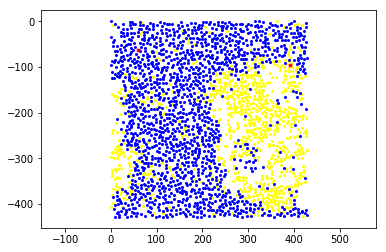

In [13]:
# test to check how is organized the matrix

print(np.shape(Mc))
f, (ax) = plt.subplots(1)

for i in range(len(Mc)):
    if Mc[i,3]==1:
        ax.scatter(Mc[i,1], -Mc[i,0], marker='o', c='yellow', s=4)
    else:
        ax.scatter(Mc[i,1], -Mc[i,0], marker='o', c='b', s=4)
plt.axis('equal')

ax.scatter(Mc[0,1], -Mc[0,0], marker='o', c='r', s=8)
ax.scatter(Mc[1,1], -Mc[1,0], marker='o', c='r', s=8)
# on voit que les points voisins dans la liste ne le sont pas dans le plan

Neighbors found within the radius d:
153
583
1375
1428
1523
1998
2051


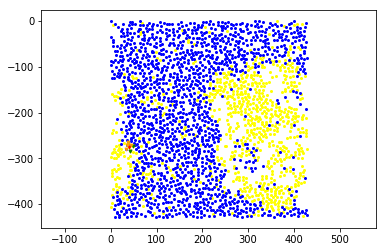

In [14]:
# check which neighbors are considered

d = 13 # cut-off distance to tune
print('Neighbors found within the radius d:')

i = 404 #28
xi = Mc[i,0]
yi = Mc[i,1]
zi = Mc[i,2]
spi = Mc[i,3]

f, (ax) = plt.subplots(1)

ax.scatter(Lo[:,1], -Lo[:,0], marker='o', c='yellow', s=4)
ax.scatter(Ld[:,1], -Ld[:,0], marker='o', c='b', s=4)

ax.scatter(Mc[i,1], -Mc[i,0], marker='v', c='red', s=8)
plt.axis('equal')

for j in range(len(Mc)):
    xj = Mc[j,0]
    yj = Mc[j,1]
    zj = Mc[j,2]
    spj = Mc[j,3]
    
    if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i:
        print(j)
        ax.scatter(Mc[j,1], -Mc[j,0], marker='v', c='orange', s=8)
        if spj==spi :
            ax.scatter(Mc[j,1], -Mc[j,0], marker='v', c='green', s=8)
        
plt.savefig(path_res+'neighbors'+name+'.pdf', format='pdf',bbox_inches='tight')

In [15]:
d = 13 # distance à afiner en A
# diviser par le nombre de voisins trouvés pour uniformiser ?
cpt_neigh_tot = 0 # compte le nb de voisins
cpt_neigh_sp = 0 # compte le nb de voisins de la même espèce

for i in range(len(Mc)):
    xi = Mc[i,0]
    yi = Mc[i,1]
    zi = Mc[i,2]
    spi = Mc[i,3] #valeur de la case espèce

    for j in range(len(Mc)):
        xj = Mc[j,0]
        yj = Mc[j,1]
        zj = Mc[j,2]
        spj = Mc[j,3]

        if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i:
            cpt_neigh_tot+=1
            if spj==spi :
                cpt_neigh_sp+=1
                
print(cpt_neigh_tot)
print(cpt_neigh_tot/len(Mc))
print(cpt_neigh_sp)
print(cpt_neigh_sp/len(Mc))

13390
5.635521885521886
11140
4.688552188552189


In [16]:
time_simu = 20 # microseconds
nb_frames_simu = 20000

In [17]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM5)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM5')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)


l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 5272
number of lipids in the upper leaflet: 2676 + number of lipids in the lower leaflet:2596 
= 5272


In [18]:
# compute the mean number of neighbors of the same species through time

tmes = 50 # frequency of the measure

time = []
neigh_tot = []
neigh_sp = []


for ts in u.trajectory:
     if (ts.frame%tmes == 0):
            print(ts.frame)
            time.append(ts.frame/ (nb_frames_simu/time_simu))
            
            xmin=0
            ymin=0
                        
            Lo = leaflet0.select_atoms("name PO4 and resname DPPC").positions # sans GM5 compris dedans
            Ld = leaflet0.select_atoms("name PO4 and resname DIPC").positions

            Lo2 = np.zeros((len(Lo),4))
            Lo2[:,0] = Lo[:,0]
            Lo2[:,1] = Lo[:,1]
            Lo2[:,2] = Lo[:,2]
            Lo2[:,3] = 1

            Ld2 = np.zeros((len(Ld),4))
            Ld2[:,0] = Ld[:,0]
            Ld2[:,1] = Ld[:,1]
            Ld2[:,2] = Ld[:,2]
            Ld2[:,3] = 0
            
            Mc=np.vstack((Lo2,Ld2))
            
            d = 13 # distance à afiner 
            # diviser par le nombre de voisins trouvés pour uniformiser ?
            cpt_neigh_tot = 0 # compte le nb de voisins
            cpt_neigh_sp = 0 # compte le nb de voisins de la même espèce

            for i in range(len(Mc)):
                xi = Mc[i,0]
                yi = Mc[i,1]
                zi = Mc[i,2]
                spi = Mc[i,3] #valeur de la case espèce

                for j in range(len(Mc)):
                    xj = Mc[j,0]
                    yj = Mc[j,1]
                    zj = Mc[j,2]
                    spj = Mc[j,3]

                    if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i :
                        cpt_neigh_tot+=1
                        if spj==spi :
                            cpt_neigh_sp+=1
                            
            neigh_tot.append(cpt_neigh_tot/len(Mc))
            neigh_sp.append(cpt_neigh_sp/len(Mc))
              

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000
10050
10100
10150

In [19]:
#print(time)
print(neigh_tot)
print(neigh_sp)

[5.181818181818182, 5.306397306397306, 5.408249158249158, 5.332491582491582, 5.410774410774411, 5.366161616161616, 5.395622895622895, 5.372895622895623, 5.448653198653199, 5.459595959595959, 5.422558922558922, 5.436026936026936, 5.356060606060606, 5.415824915824916, 5.415824915824916, 5.415824915824916, 5.43013468013468, 5.424242424242424, 5.5, 5.4587542087542085, 5.42003367003367, 5.3872053872053876, 5.427609427609427, 5.4326599326599325, 5.454545454545454, 5.497474747474747, 5.478956228956229, 5.505892255892256, 5.505892255892256, 5.46043771043771, 5.4907407407407405, 5.515151515151516, 5.463804713804714, 5.4587542087542085, 5.505892255892256, 5.456228956228956, 5.474747474747475, 5.47979797979798, 5.515993265993266, 5.5227272727272725, 5.519360269360269, 5.557239057239057, 5.5286195286195285, 5.4772727272727275, 5.521043771043771, 5.502525252525253, 5.501683501683502, 5.4646464646464645, 5.531144781144781, 5.498316498316498, 5.498316498316498, 5.555555555555555, 5.518518518518518, 5

In [20]:
np.save(path_res+'time_phase_sep.npy', time)
np.save(path_res+'neigh_tot'+name+'.npy', neigh_tot)
np.save(path_res+'neigh_sp'+name+'.npy', neigh_sp)

In [21]:
name0 = '_DPPC_DIPC_chol_352'
path_res0 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
name5 = '_DPPC_DIPC_chol_352_5GM1'
path_res5 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'
name10 = '_DPPC_DIPC_chol_352_10GM1'
path_res10 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_10/'

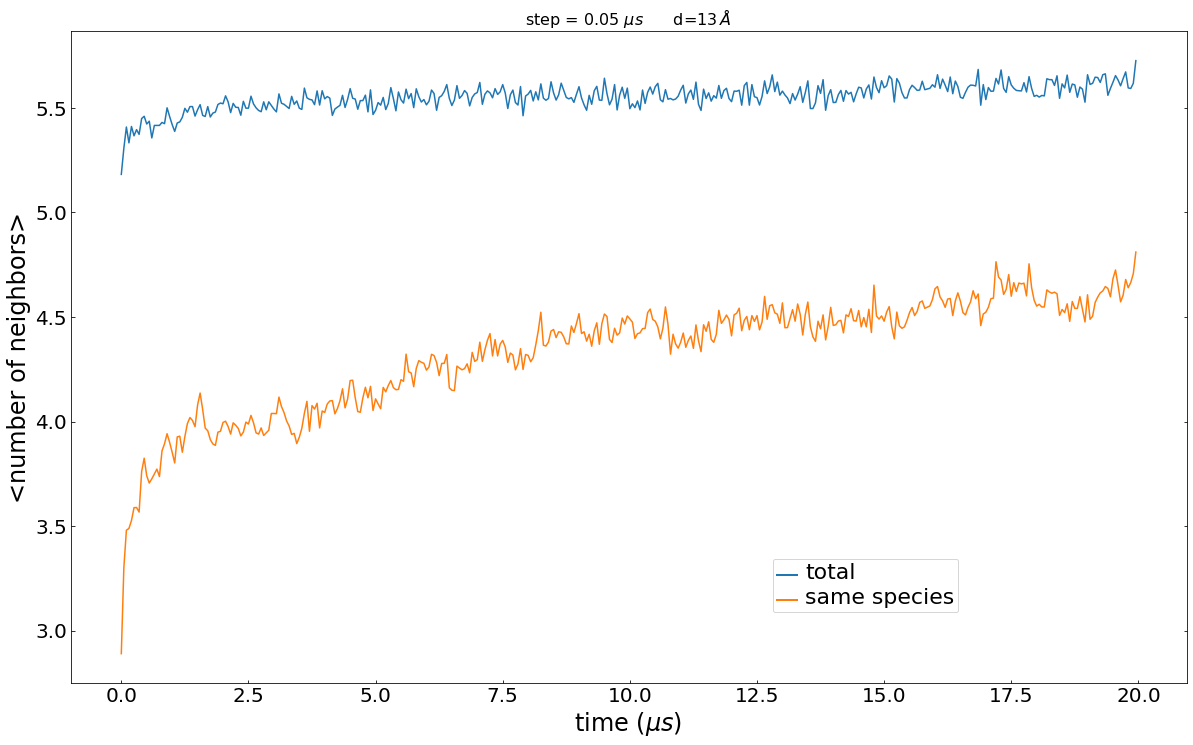

In [22]:
# plot of the mean number of neighbors of the same species and the total mean number of neighbors through time
fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(time,neigh_tot,label = 'total')
ax.plot(time,neigh_sp, label = 'same species')

#ax.plot(t,l5t,label = 'tot5')

#ax.plot(t[:100],l0s,label = '0GM1')
#ax.plot(t,l5s,label = '5GM1')
#ax.plot(t,l10s,label = '10GM1')

plt.xlabel('time ($\mu s$)',fontsize=24)
plt.ylabel('<number of neighbors>',fontsize=24)

legend = ax.legend(loc='right', bbox_to_anchor=(0.8, 0.15))
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
#frame.set_facecolor('0.90')
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize(22)
for label in legend.get_lines():
    label.set_linewidth(2)  # the legend line width
    
ax.set_title('step = %.2lf $\mu s$\t d=%d$\, \AA$' % (tmes/ (nb_frames_simu/time_simu), d ), fontsize=16)
ax.tick_params(labelsize=20)

ax.xaxis.set_tick_params(direction="in", which="both")
ax.yaxis.set_tick_params(direction="in", right=True, which="both")

plt.savefig(path_res+'neigh_time'+name+'_long50.pdf', format='pdf',bbox_inches='tight')

In [23]:
tx = np.array(time)
ny = np.array(neigh_sp)

[0.99997626 6.60192318 3.64391445]


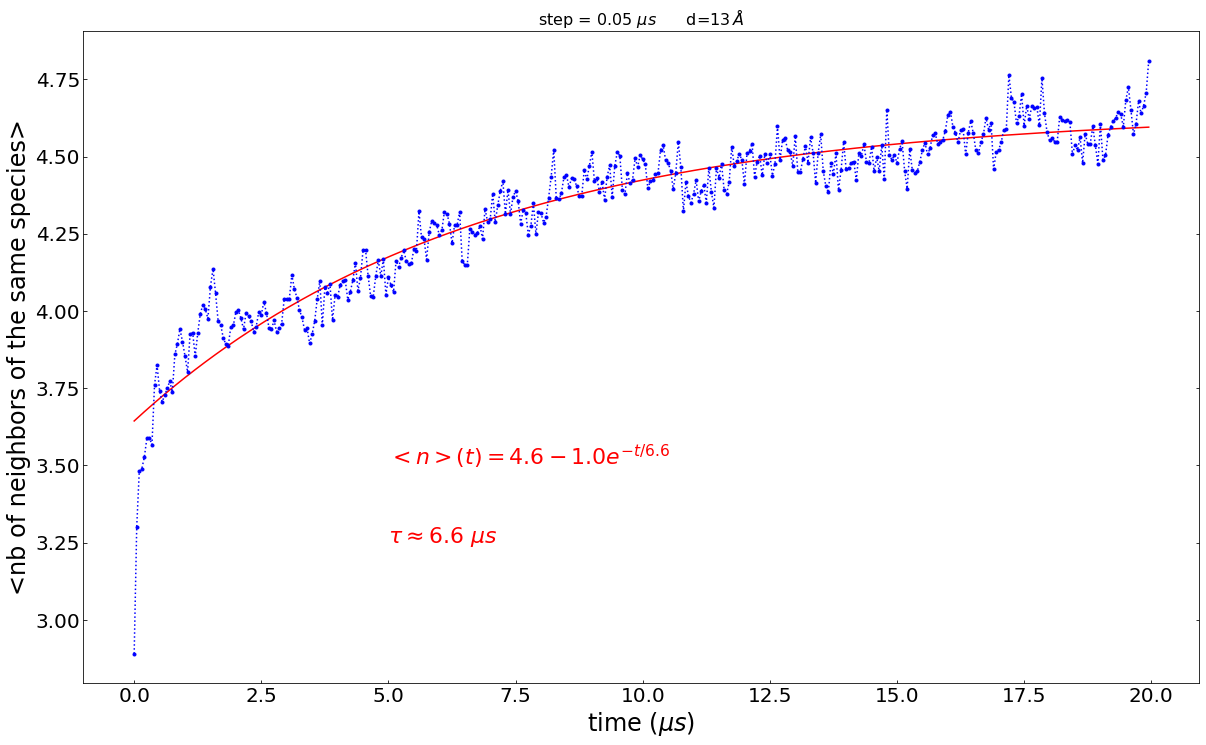

In [24]:
#------------------Fit pour une simulation----------------------------------
fig, ax = plt.subplots(figsize=(20, 12))

def fitFunc(t,A,tau,B):
        return A*(1-np.exp(-t/tau)) + B

start = [10.0,1.0,2.0]
#param_bounds=([0,0,0],[100,100,10000])

param, evol = curve_fit(fitFunc, tx, ny, p0 = start) #bounds=param_bounds
print(param)


ax.plot(tx,fitFunc(tx, *param), 'red')
ax.plot(tx, ny, ':b.')

plt.xlabel('time ($\mu s$)',fontsize=24)
plt.xticks(fontsize=16)
plt.ylabel('<nb of neighbors of the same species>',fontsize=24)
plt.yticks(fontsize=16)
plt.annotate('$ <n>(t)= %.1f- %.1fe^{-t/ %.1f } $' % (param[0]+param[2],param[0],param[1]), color='red', fontsize=22, style='italic',xy=(5,4), xytext=(5, 3.5))
plt.annotate('$ \\tau \\approx %.1f$ $\mu s$' % param[1], color='red', fontsize=22, style='italic',xy=(5,4), xytext=(5, 3.25))

ax.set_title('step = %.2lf $\mu s$\t d=%d$\, \AA$' % (tmes/ (nb_frames_simu/time_simu), d ), fontsize=16)
ax.tick_params(labelsize=20)

ax.xaxis.set_tick_params(direction="in", which="both")
ax.yaxis.set_tick_params(direction="in", right=True, which="both")

plt.savefig(path_res+'fit_neigh_time'+name+'_long50.pdf', format='pdf',bbox_inches='tight')

In [25]:
t = np.load(path_res5+'time_phase_sep.npy')

l0t = np.load(path_res0+'neigh_tot'+name0+'.npy')
l0s = np.load(path_res0+'neigh_sp'+name0+'.npy')

l5t = np.load(path_res5+'neigh_tot'+name5+'.npy')
l5s = np.load(path_res5+'neigh_sp'+name5+'.npy')

l10t = np.load(path_res10+'neigh_tot'+name10+'.npy')
l10s = np.load(path_res10+'neigh_sp'+name10+'.npy')

[1.17039089 2.82368116 3.75426174]
[1.29358732 3.44102644 3.6780642 ]
[0.99997626 6.60192318 3.64391445]


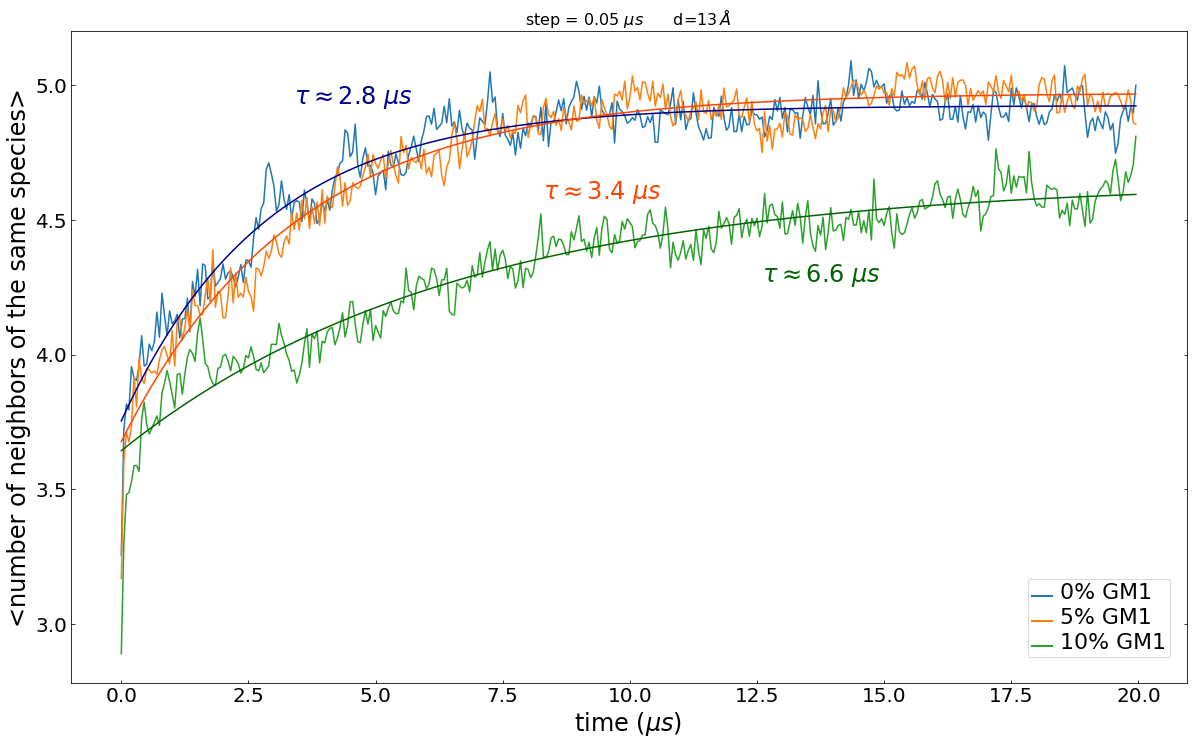

In [26]:
# plot of the mean number of neighbors of the same species and the total mean number of neighbors through time
fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(t,l0s,label = '0% GM1')
ax.plot(t,l5s,label = '5% GM1')
ax.plot(t,l10s,label = '10% GM1')


def fitFunc(t,A,tau,B):
        return A*(1-np.exp(-t/tau)) + B

start = [10.0,1.0,2.0]


param0, evol = curve_fit(fitFunc, t, l0s, p0 = start)
print(param0)
ax.plot(t,fitFunc(t, *param0), 'darkblue')

param5, evol = curve_fit(fitFunc, t, l5s, p0 = start)
print(param5)
ax.plot(t,fitFunc(t, *param5), 'orangered')

param10, evol = curve_fit(fitFunc, t, l10s, p0 = start)
print(param10)
ax.plot(t,fitFunc(t, *param10), 'darkgreen')

plt.annotate('$ \\tau \\approx %.1f$ $\mu s$' % param0[1], color='darkblue', fontsize=24, style='italic',xy=(5,4), xytext=(3.4, 4.93))
plt.annotate('$ \\tau \\approx %.1f$ $\mu s$' % param5[1], color='orangered', fontsize=24, style='italic',xy=(5,4), xytext=(8.3, 4.58))
plt.annotate('$ \\tau \\approx %.1f$ $\mu s$' % param10[1], color='darkgreen', fontsize=24, style='italic',xy=(5,4), xytext=(12.6, 4.27))

plt.xlabel('time ($\mu s$)',fontsize=24)
plt.ylabel('<number of neighbors of the same species>',fontsize=24)

legend = ax.legend(loc='right', bbox_to_anchor=(0.99, 0.1))
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
#frame.set_facecolor('0.90')
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize(22)
for label in legend.get_lines():
    label.set_linewidth(2)  # the legend line width
    
ax.set_title('step = %.2lf $\mu s$\t d=%d$\, \AA$' % (tmes/ (nb_frames_simu/time_simu), d ), fontsize=16)
ax.tick_params(labelsize=20)

ax.xaxis.set_tick_params(direction="in", which="both")
ax.yaxis.set_tick_params(direction="in", right=True, which="both")

plt.savefig(path_res+'neigh_time'+name+'_sup.pdf', format='pdf',bbox_inches='tight')